# Circuit Net train for single-stage VC-OTA with Augmented Data

In [1]:
## Imports and Global Inits

import numpy as np
import pandas as pd
import tensorflow.keras as k
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import train_test_split
from datetime import datetime

from circuit_net import *


# fix random seed for reproducibility
seed = 7
np.random.seed(7)
tf.random.set_seed(7)

2022-03-24 22:11:17.882478: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-24 22:11:17.882587: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Dataset

- Load dataset
- Augment dataset
- Scale dataset

In [2]:
dataframe = pd.read_csv("../data/ssvcamplifier(umc_013)_dataset_v2.csv")

Y = dataframe[['w8','w6','w4','w10','w1','w0','l8','l6','l4','l10','l1','l0']]
X = dataframe[['gdc','idd','gbw','pm']]

# augmentate data set

# C repeat Y after scaling as they are not modified in the augmentation procedure
X_rep, Y_rep = augment_data(X.values,Y.values,np.array([-1,1, -1, 0]), repetition_factor=40)

X_scaled, Y_scaled, scalers = scale_data(X_rep, Y_rep)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_scaled,
                                                    test_size = 0.02,
                                                    random_state = seed)

print(X.max())
print(X.min())

print(X.values.shape)
print(X_train.shape)
print(X_test.shape)

print(X_rep[0])
print(X_rep[16661])


gdc    5.678000e+01
idd    3.952600e-04
gbw    7.813500e+07
pm     7.970700e+01
dtype: float64
gdc    4.472900e+01
idd    2.208800e-04
gbw    3.424000e+07
pm     6.000000e+01
dtype: float64
(16661, 4)
(669438, 15)
(13663, 15)
[5.0783e+01 3.4554e-04 6.3914e+07 6.1706e+01]
[4.99788245e+01 3.94907309e-04 5.87670310e+07 6.17060000e+01]


In [3]:
# Save scallers

joblib.dump(scalers["X_poly"], '../models/VCOTAaug_X_poly.pkl')
joblib.dump(scalers["X_scaler"], '../models/VCOTAaug_X_scaler.pkl')
joblib.dump(scalers["Y_scaler"], '../models/VCOTAaug_Y_scaler.pkl')


['../models/VCOTAaug_Y_scaler.pkl']

In [4]:
model = build_dense_model((15, 120, 240, 60, 12), activation='relu', l2_lambda=1.3e-5)
model.load_weights('../models/circuit-net-vcota-202203242154.h5')

2022-03-24 22:11:35.286961: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-24 22:11:35.287321: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-24 22:11:35.287425: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-BHJQ8M4): /proc/driver/nvidia/version does not exist
2022-03-24 22:11:35.289873: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2022-03-24 22:11:36.750462: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 40166280 exceeds 10% of free system memory.
2022-03-24 22:11:37.243521: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 32133024 exceeds 10% of free system memory.


loss-train	 0.012467902153730392
loss-val 	 0.012386029586195946


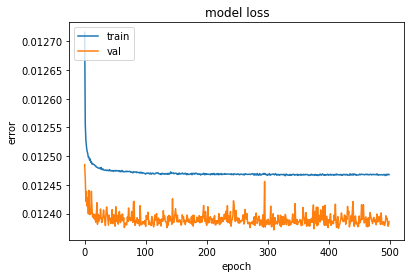

mae-train	 0.07539691776037216
mae-val 	 0.07467342168092728


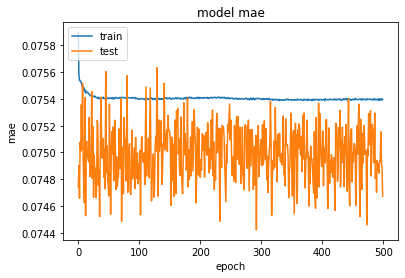

In [5]:

#Starting Time
history = model.fit(X_train, 
                    y_train, 
                    validation_data = (X_test,y_test),
                    epochs = 500, 
                    batch_size= 512, 
                    verbose = 0)
show_history(history)

In [6]:
lablels = ['_w8','_w6','_w4','_w10','_w1','_w0','_l8','_l6','_l4','_l10','_l1','_l0']

wishlist = np.array([
    [45, 0.0003, 100e6, 60],
    [60, 0.0003, 100e6, 60],
    [45, 0.0001, 50e6, 60],
    [60, 0.0001, 40e6, 60],
    [45, 0.0001, 60e6, 60]
])

print (format_circuit(predict_circuit(wishlist,model, scalers, True),lablels))


Design Variables
----
_w8 = 9.996132e-07
_w6 = 6.962951e-05
_w4 = 1.9502324e-05
_w10 = 9.709594e-06
_w1 = 3.5292112e-06
_w0 = 4.71988e-05
_l8 = 9.859189e-07
_l6 = 8.166345e-07
_l4 = 7.7185916e-07
_l10 = 8.620312e-07
_l1 = 2.2941742e-07
_l0 = 4.046082e-07
----
Design Variables
----
_w8 = 9.983755e-07
_w6 = 5.319985e-05
_w4 = 1.21492085e-05
_w10 = 5.165818e-06
_w1 = 1.076322e-06
_w0 = 1.6360362e-05
_l8 = 9.717012e-07
_l6 = 6.446572e-07
_l4 = 6.2201707e-07
_l10 = 8.836121e-07
_l1 = 2.6141498e-07
_l0 = 5.6492206e-07
----
Design Variables
----
_w8 = 9.978155e-07
_w6 = 9.1871e-05
_w4 = 3.2735028e-05
_w10 = 1.2786163e-05
_w1 = 9.93666e-06
_w0 = 0.00010992395
_l8 = 9.87706e-07
_l6 = 1.0588404e-06
_l4 = 9.934683e-07
_l10 = 9.440809e-07
_l1 = 2.654964e-07
_l0 = 7.4993517e-07
----
Design Variables
----
_w8 = 9.974203e-07
_w6 = 8.770653e-05
_w4 = 3.0072948e-05
_w10 = 1.0461732e-05
_w1 = 6.7420183e-06
_w0 = 9.137899e-05
_l8 = 9.809181e-07
_l6 = 1.0103865e-06
_l4 = 9.480864e-07
_l10 = 9.787461e-07
_

In [7]:
date_str = '{:%Y%m%d%H%M}'.format(datetime.now())

model_1 = model.save_weights('../models/circuit-net-vcota-augmented_translearn-'+date_str+'.h5')